In [230]:
# import libraries
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
from matplotlib import pyplot as plt

In [231]:
#declare dataframe to be used throughout this code
nm=pd.DataFrame()

In [232]:
#function to iterate through the data
def souped(page,char):
    soup = BeautifulSoup(page.content, 'html5lib')
    table = soup.findAll('b')
    names=[]
    for row in table:
        names.append(row.text.strip())
    for x in names:
        x=x.strip(':')
        if x=='Monica':
            char['Monica']+=1
        if x=='Chandler':
            char['Chandler']+=1
        if x=='Ross':
            char['Ross']+=1
        if x=='Rachel':
            char['Rachel']+=1
        if x=='Phoebe':
            char['Phoebe']+=1
        if x=='Joey':
            char['Joey']+=1       

In [233]:
#access website and retrieve required data

stri='https://fangj.github.io/friends/season/01'
for i in range(1,25):
    if(i<10):
        page = requests.get(stri+'0'+str(i)+'.html')
    else:
        page=requests.get(stri+str(i)+'.html')
        
    char = {'Monica':0,'Chandler':0,'Joey':0,'Rachel':0,'Phoebe':0,'Ross':0}
    souped(page,char)
    
    nm=nm.append(char,ignore_index=True)

In [241]:
#rename indices to match episode number
nm=nm.rename(index={x:x+1 for x in nm.index})

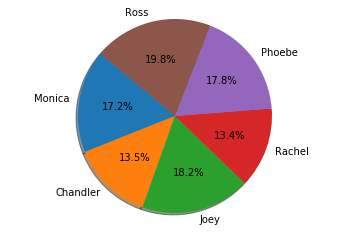

In [236]:
#pie chart depicting comparison between number of times spoken by each friend

labels = 'Monica','Chandler','Joey','Rachel','Phoebe','Ross'
fracs = nm.sum()

plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Joey')

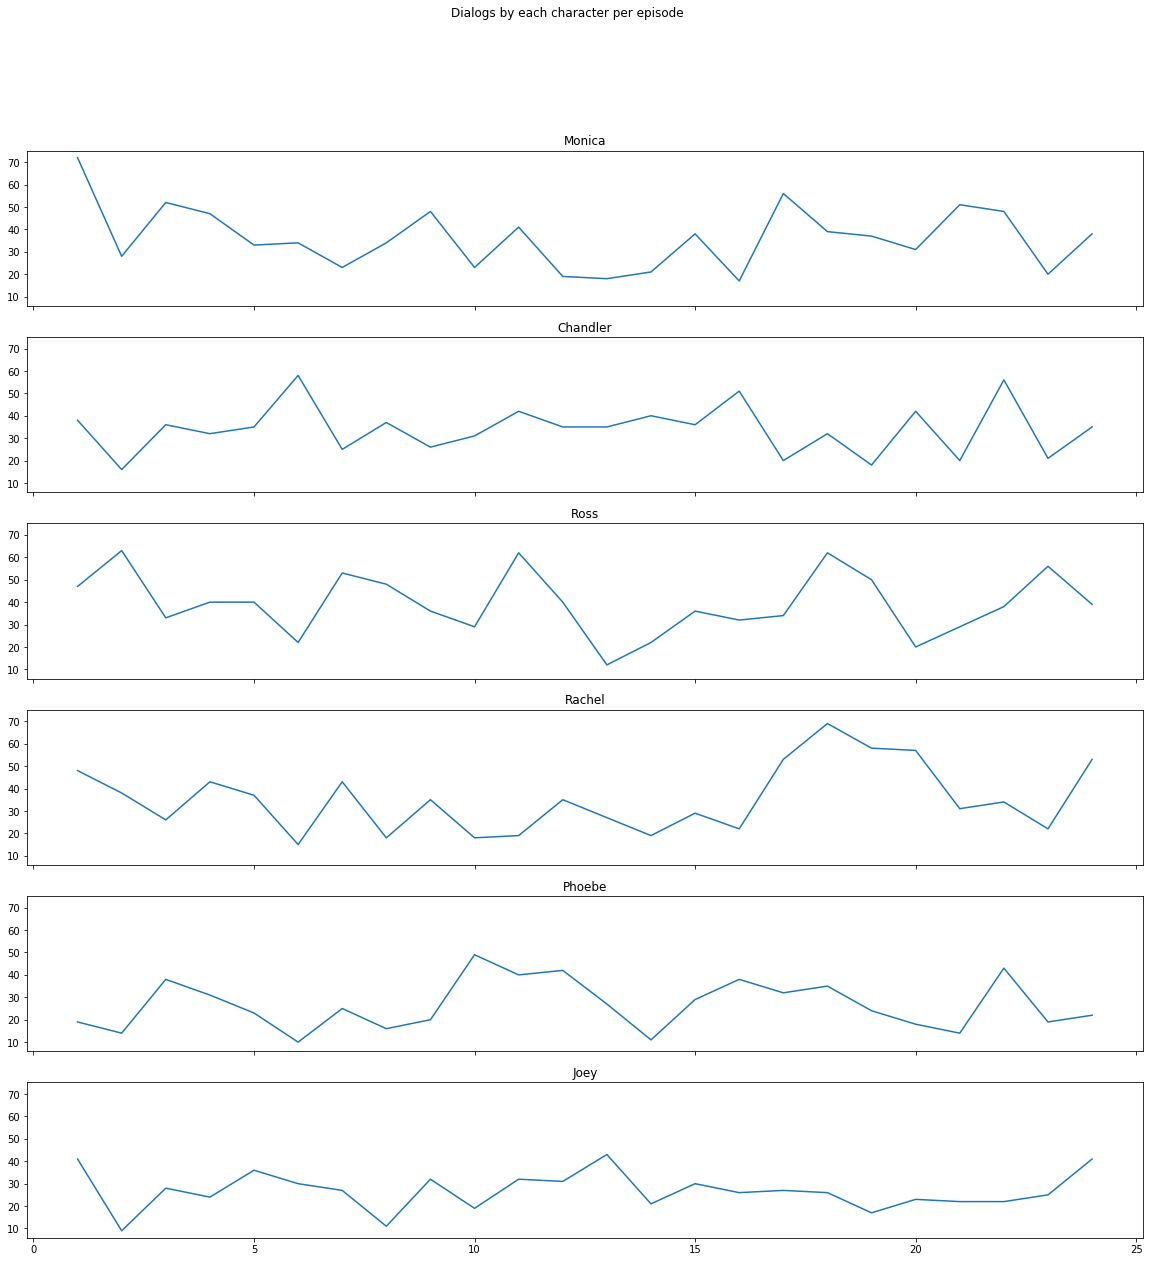

In [271]:
#plot to show variation in speech trends of each character

fig, axs = plt.subplots(6,figsize=(20,20),sharex=True,sharey=True)
fig.suptitle('Dialogs by each character per episode')
axs[0].plot(range(1,25), nm['Monica'])
axs[1].plot(range(1,25), nm['Chandler'])
axs[2].plot(range(1,25), nm['Ross'])
axs[3].plot(range(1,25), nm['Rachel'])
axs[4].plot(range(1,25), nm['Phoebe'])
axs[5].plot(range(1,25), nm['Joey'])

axs[0].set_title('Monica')
axs[1].set_title('Chandler')
axs[2].set_title('Ross')
axs[3].set_title('Rachel')
axs[4].set_title('Phoebe')
axs[5].set_title('Joey')

In [269]:
#convert to csv
nm.to_csv('season1')

In [270]:
#testing the load
test=pd.read_csv('season1',index_col=0)
test.head()

,Chandler,Joey,Monica,Phoebe,Rachel,Ross
1,38.0,41.0,72.0,19.0,48.0,47.0
2,16.0,9.0,28.0,14.0,38.0,63.0
3,36.0,28.0,52.0,38.0,26.0,33.0
4,32.0,24.0,47.0,31.0,43.0,40.0
5,35.0,36.0,33.0,23.0,37.0,40.0
